In [1]:
'''
Problem 1: Prediction task is to determine whether a person makes over 50K a year.

Problem 2: Which factors are important

Problem 3: Which algorithms are best for this dataset'''

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,roc_auc_score
import xgboost as xgb

from matplotlib import pyplot as pt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV

sns.set(color_codes=True)
% matplotlib inline

In [2]:
#Loading data

train_set  = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [3]:
#Add columns labels
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [4]:
train_set.columns = col_labels 
test_set.columns = col_labels

In [5]:
#Train data header
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#Test data header
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
#Data Cleaning
#Step1 : Removing rows contains '?'

train_set =train_set.replace(regex='\?',value=pd.np.nan).dropna(how='any')
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


count    30162.000000
mean        40.931238
std         11.979984
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

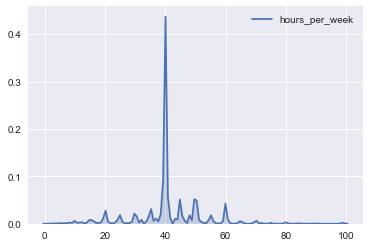

In [8]:
#Transformation of data
#column : hours_per_week
sns.kdeplot(train_set.hours_per_week,shade=True)
train_set.hours_per_week.describe()

In [9]:
'''As per above summary and plot we understood that most of the people working 40 to 45 hours therefore, we will group hours_per_week into 5 relavent groups as below

group 1: less_than_40
group 2: between_40_to_45
group 3 :between_45_to_60
group 4 :between_60_to_80¶
group 5 :more_than_80'''
train_set.hours_per_week=train_set.hours_per_week.astype(int)
train_set.loc[train_set.hours_per_week < 40,'hours_per_week_group'] = 'less_than_40'
train_set.loc[(train_set.hours_per_week >= 40) & (train_set.hours_per_week <= 45),'hours_per_week_group'] = 'between_40_to_45'
train_set.loc[(train_set.hours_per_week > 45) & (train_set.hours_per_week <= 60),'hours_per_week_group'] = 'between_45_to_60'
train_set.loc[(train_set.hours_per_week > 60) & (train_set.hours_per_week <= 80),'hours_per_week_group'] = 'between_60_to_80'
train_set.loc[train_set.hours_per_week > 80,'hours_per_week_group'] = 'more_than_40'

In [10]:
train_set['hours_per_week_group'].head()

0    between_40_to_45
1        less_than_40
2    between_40_to_45
3    between_40_to_45
4    between_40_to_45
Name: hours_per_week_group, dtype: object

In [11]:
#column:native_country
train_set.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [12]:
len(train_set.native_country.unique())

41

In [13]:
#categorical variable named native_county has 41 unique values, 
#if we use directly this column for training it might lead to overfitting, 
#therefore thransforming native_county into native_region
Asia_East = np.array([" Cambodia", " China", " Hong", " Laos", " Thailand"," Japan", " Taiwan", " Vietnam"," Philippines"])
Asia_Central = np.array([" India", " Iran"])
Central_America =  np.array([" Cuba", " Guatemala", " Jamaica", " Nicaragua"," Puerto-Rico",  " Dominican-Republic", " El-Salvador"," Haiti", " Honduras", " Mexico", " Trinadad&Tobago"])
South_America = np.array([" Ecuador", " Peru", " Columbia"," South"])
Europe_West = np.array([" England", " Germany", " Holand-Netherlands", " Ireland"," France", " Greece", " Italy", " Portugal", " Scotland"])
Europe_East = np.array([" Poland", " Yugoslavia", " Hungary"])
North_America = np.array([" Outlying-US(Guam-USVI-etc)", " United-States"," Canada"])


In [15]:
train_set.loc[train_set.native_country.isin(Asia_East),'native_region'] = 'Asia_East'
train_set.loc[train_set.native_country.isin(Asia_Central),'native_region'] = 'Asia_Central'
train_set.loc[train_set.native_country.isin(Central_America),'native_region'] = 'Central_America'
train_set.loc[train_set.native_country.isin(South_America),'native_region'] = 'South_America'
train_set.loc[train_set.native_country.isin(Europe_West),'native_region'] = 'Europe_West'
train_set.loc[train_set.native_country.isin(Europe_East),'native_region'] = 'Europe_East'
train_set.loc[train_set.native_country.isin(North_America),'native_region'] = 'North_America'

In [16]:
train_set.native_region.unique()

array(['North_America', 'Central_America', 'Asia_Central', 'Europe_West',
       'Asia_East', 'Europe_East', 'South_America'], dtype=object)

count    30162.000000
mean      1092.007858
std       7406.346497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

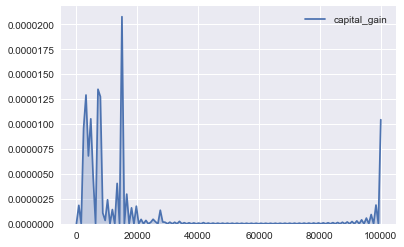

In [17]:
#column : capital_gain & capital_loss
sns.kdeplot(train_set.capital_gain,shade=True)
train_set.capital_gain.describe()

count    30162.000000
mean        88.372489
std        404.298370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

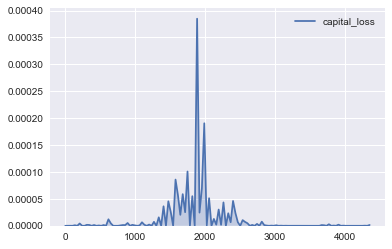

In [18]:
sns.kdeplot(train_set.capital_loss,shade=True)
train_set.capital_loss.describe()

In [19]:
#As per above summary and plots, we understood that most of the values of capital_gain & capital_loss are zeros, 
#therefore we are replacing 0 with mean of columns to avoid overfitting
capital_gain_mean = train_set.capital_gain.mean()
capital_loss_mean = train_set.capital_loss.mean()

In [20]:
train_set.loc[train_set.capital_gain == 0 ,'capital_gain'] = capital_gain_mean
train_set.loc[train_set.capital_loss == 0 ,'capital_loss'] = capital_loss_mean

In [21]:
train_set.capital_gain.describe()

count    30162.000000
mean      2092.128044
std       7263.712520
min        114.000000
25%       1092.007858
50%       1092.007858
75%       1092.007858
max      99999.000000
Name: capital_gain, dtype: float64

In [22]:
train_set.capital_loss.describe()

count    30162.000000
mean       172.563970
std        385.912263
min         88.372489
25%         88.372489
50%         88.372489
75%         88.372489
max       4356.000000
Name: capital_loss, dtype: float64

In [23]:
#column : work class : No Change required
train_set.workclass.describe()

count        30162
unique           7
top        Private
freq         22286
Name: workclass, dtype: object

In [24]:
train_set.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [25]:
#Convert categorical variables into numerical format -- eduction and education_num are duplicate values
workclass = pd.factorize(train_set.workclass)
education = pd.factorize(train_set.education)
hours_per_week_group = pd.factorize(train_set.hours_per_week_group) ## Tacking grouping 
marital_status = pd.factorize(train_set.marital_status)
occupation = pd.factorize(train_set.occupation)
relationship = pd.factorize(train_set.relationship)
race = pd.factorize(train_set.race)
sex = pd.factorize(train_set.sex)
native_region = pd.factorize(train_set.native_region) ## Tacking region
wage_class = pd.factorize(train_set.wage_class)

In [26]:
X_train = pd.DataFrame({'age':train_set.age,'workclass':workclass[0],'fnlwgt':train_set.fnlwgt,'education':education[0],
                        'hours_per_week_group':hours_per_week_group[0],'marital_status':marital_status[0],'occupation':
                        occupation[0],'relationship':relationship[0],'race':race[0],'sex':sex[0],'capital_gain':
                        train_set.capital_gain,'capital_loss':train_set.capital_loss,'hours_per_week_group':
                        hours_per_week_group[0],'native_region':native_region[0]})
Y_train = wage_class[0]
X_train.head()

,age,capital_gain,capital_loss,education,fnlwgt,hours_per_week_group,marital_status,native_region,occupation,race,relationship,sex,workclass
0,39,2174.000000,88.372489,0,77516,0,0,0,0,0,0,0,0
1,50,1092.007858,88.372489,0,83311,1,1,0,1,0,1,0,1
2,38,1092.007858,88.372489,1,215646,0,2,0,2,0,0,0,2
3,53,1092.007858,88.372489,2,234721,0,1,0,2,1,1,0,2
4,28,1092.007858,88.372489,0,338409,0,1,1,3,1,2,1,2


In [27]:
#Clean test data : we are following the same steps followed for Train data
test_set=test_set.replace(regex='\?',value=pd.np.nan).dropna(how='any') ## removing ?
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [28]:
#column : hours_per_week
test_set.hours_per_week=test_set.hours_per_week.astype(int)
test_set.loc[test_set.hours_per_week < 40,'hours_per_week_group'] = 'less_than_40'
test_set.loc[(test_set.hours_per_week >= 40) & (test_set.hours_per_week <= 45),'hours_per_week_group'] = 'between_40_to_45'
test_set.loc[(test_set.hours_per_week > 45) & (test_set.hours_per_week <= 60),'hours_per_week_group'] = 'between_45_to_60'
test_set.loc[(test_set.hours_per_week > 60) & (test_set.hours_per_week <= 80),'hours_per_week_group'] = 'between_60_to_80'
test_set.loc[test_set.hours_per_week > 80,'hours_per_week_group'] = 'more_than_40'

In [29]:
#column:native_country
test_set.loc[test_set.native_country.isin(Asia_East),'native_region'] = 'Asia_East'
test_set.loc[test_set.native_country.isin(Asia_Central),'native_region'] = 'Asia_Central'
test_set.loc[test_set.native_country.isin(Central_America),'native_region'] = 'Central_America'
test_set.loc[test_set.native_country.isin(South_America),'native_region'] = 'South_America'
test_set.loc[test_set.native_country.isin(Europe_West),'native_region'] = 'Europe_West'
test_set.loc[test_set.native_country.isin(Europe_East),'native_region'] = 'Europe_East'
test_set.loc[test_set.native_country.isin(North_America),'native_region'] = 'North_America'

In [30]:
test_set.native_region.unique()

array(['North_America', 'South_America', 'Central_America', 'Europe_West',
       'Asia_East', 'Asia_Central', 'Europe_East'], dtype=object)

In [31]:
#column : capital_gain & capital_loss
capital_gain_mean = test_set.capital_gain.mean()
capital_loss_mean = test_set.capital_loss.mean()

In [32]:
test_set.loc[test_set.capital_gain == 0 ,'capital_gain'] = capital_gain_mean
test_set.loc[test_set.capital_loss == 0 ,'capital_loss'] = capital_loss_mean

In [33]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,hours_per_week_group,native_region
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,1120.301594,89.041899,40,United-States,<=50K.,between_40_to_45,North_America
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1120.301594,89.041899,50,United-States,<=50K.,between_45_to_60,North_America
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,1120.301594,89.041899,40,United-States,>50K.,between_40_to_45,North_America
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.000000,89.041899,40,United-States,>50K.,between_40_to_45,North_America
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,1120.301594,89.041899,30,United-States,<=50K.,less_than_40,North_America


In [34]:
#Cleaning test wage_class
test_set.wage_class.head()

0     <=50K.
1     <=50K.
2      >50K.
3      >50K.
5     <=50K.
Name: wage_class, dtype: object

In [35]:
#removing extra '.'
test_set.loc[test_set.wage_class == ' <=50K.' ,'wage_class'] = ' <=50K'
test_set.loc[test_set.wage_class == ' >50K.' ,'wage_class'] = ' >50K'
test_set.wage_class.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
5     <=50K
Name: wage_class, dtype: object

In [36]:
#Convert categorical variables into numerical format ---- eduction and education_num are duplicate values

workclass  = pd.factorize(test_set.workclass)
education = pd.factorize(test_set.education)
hours_per_week_group = pd.factorize(test_set.hours_per_week_group) ## Tacking grouping 
marital_status = pd.factorize(test_set.marital_status)
occupation = pd.factorize(test_set.occupation)
relationship = pd.factorize(test_set.relationship)
race = pd.factorize(test_set.race)
sex = pd.factorize(test_set.sex)
native_region = pd.factorize(test_set.native_region) ## Tacking region
wage_class = pd.factorize(test_set.wage_class)

In [37]:
X_test = pd.DataFrame({'age':test_set.age,'workclass':workclass[0],'fnlwgt':test_set.fnlwgt,'education':education[0],'hours_per_week_group':hours_per_week_group[0],'marital_status':marital_status[0],'occupation':occupation[0],'relationship':relationship[0],'race':race[0],'sex':sex[0],'capital_gain':test_set.capital_gain,'capital_loss':test_set.capital_loss,'hours_per_week_group':hours_per_week_group[0],'native_region':native_region[0]})
Y_test = wage_class[0]
X_test.head()

,age,capital_gain,capital_loss,education,fnlwgt,hours_per_week_group,marital_status,native_region,occupation,race,relationship,sex,workclass
0,25,1120.301594,89.041899,0,226802,0,0,0,0,0,0,0,0
1,38,1120.301594,89.041899,1,89814,1,1,0,1,1,1,0,0
2,28,1120.301594,89.041899,2,336951,0,1,0,2,1,1,0,1
3,44,7688.000000,89.041899,3,160323,0,1,0,0,0,1,0,0
5,34,1120.301594,89.041899,4,198693,2,0,0,3,1,2,0,0


In [38]:
print(dir(xgb))

['Booster', 'DMatrix', 'VERSION_FILE', 'XGBClassifier', 'XGBModel', 'XGBRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'absolute_import', 'callback', 'compat', 'core', 'cv', 'f', 'libpath', 'os', 'plot_importance', 'plot_tree', 'plotting', 'rabit', 'sklearn', 'to_graphviz', 'train', 'training']


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.8052
AUC Score (Train): 0.795758


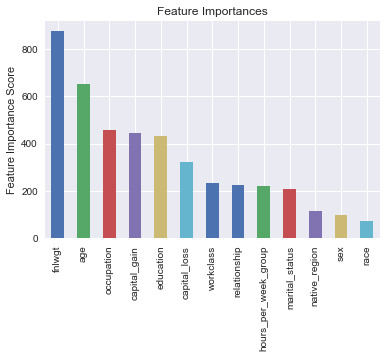

In [39]:
'''Train Model & Test
Alg : XGBoost
Step1:Tuning Tree Based Parameters'''
model = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_param = model.get_xgb_params()
dtrain = xgb.DMatrix(data=X_train,label=Y_train)

## To Get CV Result
cvresult = xgb.cv(xgb_param, dtrain, num_boost_round=model.get_params()['n_estimators'], nfold=5,
            metrics='auc', early_stopping_rounds=50)

## Set CV Result
model.set_params(n_estimators=cvresult.shape[0])

## Fit Model
model.fit(X_train, Y_train)

## Predict 
Y_pred=model.predict(X_test)
pred_prob = model.predict_proba(X_test)[:,1]

print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))
print ("AUC Score (Train): %f" % roc_auc_score(Y_test, pred_prob))


feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
pt.ylabel('Feature Importance Score')
pt.show()

In [41]:
#Step2:Tune max_depth and min_child_weight

param_test1  = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92120, std: 0.00305, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.92056, std: 0.00279, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.92022, std: 0.00301, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.92511, std: 0.00262, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.92454, std: 0.00281, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.92366, std: 0.00278, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.92411, std: 0.00299, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.92354, std: 0.00307, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.92278, std: 0.00304, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.92177, std: 0.00306, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.92111, std: 0.00282, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.92091, std: 0.00265, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [42]:
#The ideal values are 5 for max_depth & 1 for min_child_weight , Lets go one step deeper and look for optimum values, 
#we one above and below of optimum values because we took an interval of 2
param_test1 = {
 'max_depth':[4,5,6],
 'min_child_weight':[1,2]
}

gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92414, std: 0.00286, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.92405, std: 0.00287, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.92511, std: 0.00262, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.92486, std: 0.00282, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: 0.92441, std: 0.00279, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.92440, std: 0.00247, params: {'max_depth': 6, 'min_child_weight': 2}],
 {'max_depth': 5, 'min_child_weight': 1},
 0.9251141803200926)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.8047
AUC Score (Test): 0.797120


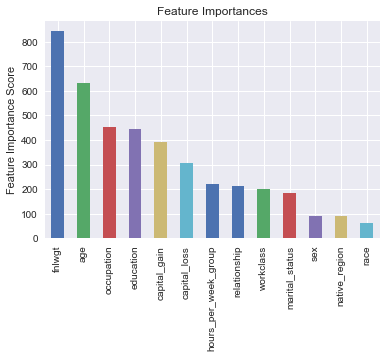

In [43]:
#Test Model with 'max_depth': 5, 'min_child_weight': 2¶
model = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_param = model.get_xgb_params()
dtrain = xgb.DMatrix(data=X_train,label=Y_train)

## To Get CV Result
cvresult = xgb.cv(xgb_param, dtrain, num_boost_round=model.get_params()['n_estimators'], nfold=5,
            metrics='auc', early_stopping_rounds=50)

## Set CV Result
model.set_params(n_estimators=cvresult.shape[0])

## Fit Model
model.fit(X_train, Y_train)

## Predict 
Y_pred=model.predict(X_test)
pred_prob = model.predict_proba(X_test)[:,1]

print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))
print ("AUC Score (Test): %f" % roc_auc_score(Y_test, pred_prob))


feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
pt.ylabel('Feature Importance Score')
pt.show()

In [44]:
#Step3:Tune Gamma
param_test1 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92484, std: 0.00285, params: {'gamma': 0.0},
  mean: 0.92514, std: 0.00294, params: {'gamma': 0.1},
  mean: 0.92479, std: 0.00277, params: {'gamma': 0.2},
  mean: 0.92486, std: 0.00285, params: {'gamma': 0.3},
  mean: 0.92487, std: 0.00295, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.9251376899246753)

In [45]:
#Optimum value for gamma is 0
#Step4:Tune subsample and colsample_bytree
param_test1 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92485, std: 0.00253, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.92489, std: 0.00272, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.92581, std: 0.00257, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.92589, std: 0.00257, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.92395, std: 0.00281, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.92439, std: 0.00261, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.92487, std: 0.00280, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.92573, std: 0.00284, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.92366, std: 0.00250, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.92454, std: 0.00269, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.92484, std: 0.00285, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.92503, std: 0.00258, params: {'colsample_bytree': 0.8, 'subsample'

In [46]:
param_test1 = {
 'subsample':[i/100 for i in range(55,70,5)],
 'colsample_bytree':[i/100 for i in range(85,100,5)]
}

gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92352, std: 0.00254, params: {'colsample_bytree': 0.85, 'subsample': 0.55},
  mean: 0.92351, std: 0.00255, params: {'colsample_bytree': 0.85, 'subsample': 0.6},
  mean: 0.92385, std: 0.00258, params: {'colsample_bytree': 0.85, 'subsample': 0.65},
  mean: 0.92352, std: 0.00254, params: {'colsample_bytree': 0.9, 'subsample': 0.55},
  mean: 0.92351, std: 0.00255, params: {'colsample_bytree': 0.9, 'subsample': 0.6},
  mean: 0.92385, std: 0.00258, params: {'colsample_bytree': 0.9, 'subsample': 0.65},
  mean: 0.92314, std: 0.00234, params: {'colsample_bytree': 0.95, 'subsample': 0.55},
  mean: 0.92338, std: 0.00262, params: {'colsample_bytree': 0.95, 'subsample': 0.6},
  mean: 0.92339, std: 0.00199, params: {'colsample_bytree': 0.95, 'subsample': 0.65}],
 {'colsample_bytree': 0.85, 'subsample': 0.65},
 0.9238541726668739)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.8013
AUC Score (Test): 0.788458


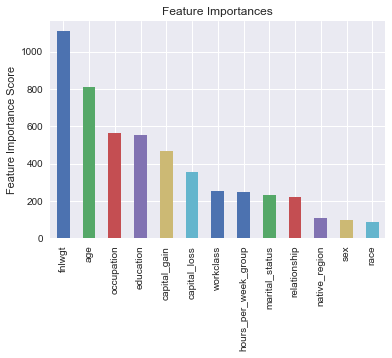

In [47]:
#Optimum values of colsample_bytree is 0.85 and subsample is 0.65
model = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.85,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_param = model.get_xgb_params()
dtrain = xgb.DMatrix(data=X_train,label=Y_train)

## To Get CV Result
cvresult = xgb.cv(xgb_param, dtrain, num_boost_round=model.get_params()['n_estimators'], nfold=5,
            metrics='auc', early_stopping_rounds=50)

## Set CV Result
model.set_params(n_estimators=cvresult.shape[0])

## Fit Model
model.fit(X_train, Y_train)

## Predict 
Y_pred=model.predict(X_test)
pred_prob = model.predict_proba(X_test)[:,1]

print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))
print ("AUC Score (Test): %f" % roc_auc_score(Y_test, pred_prob))


feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
pt.ylabel('Feature Importance Score')
pt.show()

In [48]:
#Step5: Tuning Regularization Parameters
param_test1 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92506, std: 0.00273, params: {'reg_alpha': 1e-05},
  mean: 0.92525, std: 0.00267, params: {'reg_alpha': 0.01},
  mean: 0.92492, std: 0.00275, params: {'reg_alpha': 0.1},
  mean: 0.92479, std: 0.00302, params: {'reg_alpha': 1},
  mean: 0.90229, std: 0.00352, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.01},
 0.9252496709028106)

In [49]:
param_test1 = {
'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92506, std: 0.00273, params: {'reg_alpha': 0},
  mean: 0.92524, std: 0.00272, params: {'reg_alpha': 0.001},
  mean: 0.92526, std: 0.00292, params: {'reg_alpha': 0.005},
  mean: 0.92525, std: 0.00267, params: {'reg_alpha': 0.01},
  mean: 0.92509, std: 0.00257, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.005},
 0.9252556082806102)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.8054
AUC Score (Test): 0.791901


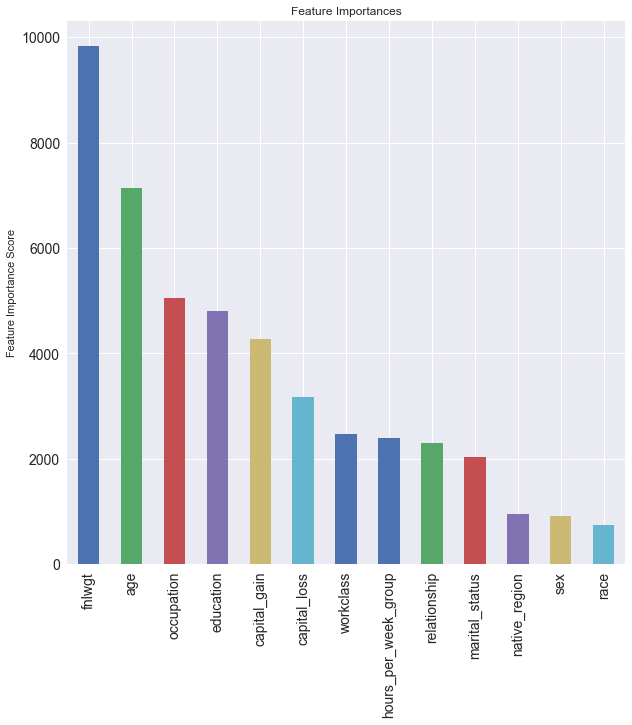

In [50]:
#Step6: Reducing Learning Rate
model = xgb.XGBClassifier(learning_rate =0.01,
 n_estimators=5000,
 reg_alpha= 0.001,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.85,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_param = model.get_xgb_params()
dtrain = xgb.DMatrix(data=X_train,label=Y_train)

## To Get CV Result
cvresult = xgb.cv(xgb_param, dtrain, num_boost_round=model.get_params()['n_estimators'], nfold=5,
            metrics='auc', early_stopping_rounds=50)

## Set CV Result
model.set_params(n_estimators=cvresult.shape[0])

## Fit Model
model.fit(X_train, Y_train)

## Predict 
Y_pred=model.predict(X_test)
pred_prob = model.predict_proba(X_test)[:,1]

print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))
print ("AUC Score (Test): %f" % roc_auc_score(Y_test, pred_prob))


feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize=(10,10),fontsize=14)
pt.ylabel('Feature Importance Score')
pt.show()

In [51]:
#Alg:Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))

Accuracy : 0.7913


In [53]:
#Alg:Naïve Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB

GaussianNB(priors=None)

In [54]:
GNB.fit(X_train,Y_train)
Y_pred = GNB.predict(X_test)
print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))

Accuracy : 0.7905


In [55]:
#Alg: Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
SGD

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=101,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [56]:
SGD.fit(X_train,Y_train)
Y_pred = SGD.predict(X_test)
print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))

Accuracy : 0.6793


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [57]:
#Alg:K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 10,leaf_size=20)
KNC

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [58]:
KNC.fit(X_train,Y_train)
Y_pred = KNC.predict(X_test)
print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))

Accuracy : 0.7897


In [59]:
#Alg: Decision Tree
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier(max_depth=30, max_features=8, max_leaf_nodes=95,random_state=105)
DC

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=8, max_leaf_nodes=95, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=105, splitter='best')

In [60]:
DC.fit(X_train,Y_train)
Y_pred = DC.predict(X_test)
print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))

Accuracy : 0.8026


In [61]:
#Alg:Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=5000,max_depth=30, max_features=8, max_leaf_nodes=95,random_state=105)
RFC

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features=8, max_leaf_nodes=95,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
            oob_score=False, random_state=105, verbose=0, warm_start=False)

In [62]:
RFC.fit(X_train,Y_train)
Y_pred = RFC.predict(X_test)
print ("Accuracy : %.4g" % accuracy_score(Y_test, Y_pred))

Accuracy : 0.8056


In [ ]:
#Note : XGBoost ,Random Forest &Decision Tree is the best Algorithm this data set